## Weining Wu (wew423)
## BUAN 357
## Paper 2 Code
## ---------------------------------------------------------------------------

## Data Loading and Exploration

Data URL: https://www.kaggle.com/datasets/mitishaagarwal/patient?select=dataset.csv

Note: The code in the followin block loads the data from a local file.

(Please click "Choose Files" button when the code is running to upload the data file. Thanks!)

In [1]:
# Load data
import pandas as pd

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['ICU_Weining Wu.csv']))


Saving ICU_Weining Wu.csv to ICU_Weining Wu.csv


In [2]:
# Preview the data
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [3]:
# Count the total number of missing data in the dataset
print(df.isnull().values.sum())

288046


In [4]:
# Count the number of missing value in each the column 
print(df.isnull().sum())

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64


In [5]:
# Select variables to be used in the modeling
df_selected = df[['age','elective_surgery','weight','arf_apache','d1_temp_max','d1_temp_min','d1_heartrate_max','d1_heartrate_min',
                  'd1_mbp_max','d1_mbp_min','d1_resprate_max','d1_resprate_min','d1_glucose_max','d1_glucose_min','hospital_death']]

# Preview the selected variables
df_selected

,age,elective_surgery,weight,arf_apache,d1_temp_max,d1_temp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_glucose_max,d1_glucose_min,hospital_death
0,68.0,0,73.9,0.0,39.9,37.2,119.0,72.0,89.0,46.0,34.0,10.0,168.0,109.0,0
1,77.0,0,70.2,0.0,36.3,35.1,118.0,72.0,120.0,38.0,32.0,12.0,145.0,128.0,0
2,25.0,0,95.3,0.0,37.0,36.7,96.0,68.0,102.0,68.0,21.0,8.0,NaN,NaN,0
3,81.0,1,61.7,0.0,38.0,34.8,116.0,92.0,84.0,84.0,23.0,7.0,185.0,88.0,0
4,19.0,0,NaN,0.0,37.2,36.7,89.0,60.0,104.0,90.0,18.0,16.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,0,72.9,0.0,38.2,36.6,115.0,70.0,109.0,48.0,27.0,9.0,400.0,187.0,0
91709,56.0,0,158.0,0.0,37.4,36.1,100.0,76.0,82.0,47.0,33.0,12.0,177.0,177.0,0
91710,48.0,0,78.9,0.0,36.9,35.8,158.0,79.0,82.0,57.0,34.0,0.0,538.0,86.0,0
91711,NaN,0,55.9,0.0,36.5,36.3,82.0,60.0,108.0,54.0,23.0,14.0,NaN,NaN,0


## Data Preprocessing

In [6]:
# Import the necessary package
import numpy as np

In [7]:
#np.corrcoef(df_selected.height,df_selected.weight)

#covariance = cov(df_selected.height, df_selected.bmi)
#print(covariance)

# Show the correlations between variables
# Predictor variables to be used in modelling should be independent.
corr_before = df_selected.corr()
corr_before.style.background_gradient(cmap='coolwarm')

,age,elective_surgery,weight,arf_apache,d1_temp_max,d1_temp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_glucose_max,d1_glucose_min,hospital_death
age,1.000000,0.067320,-0.127252,-0.001684,-0.082764,-0.070002,-0.135417,-0.143705,0.006123,-0.131755,0.032206,0.034439,0.012538,0.067118,0.111017
elective_surgery,0.067320,1.000000,0.026900,-0.027357,0.077195,-0.033104,-0.073569,-0.025685,-0.141750,0.012453,-0.063515,-0.172378,-0.014436,-0.004182,-0.093574
weight,-0.127252,0.026900,1.000000,-0.010785,0.032039,0.036138,-0.038491,0.000898,0.070165,0.055879,-0.006198,-0.035975,0.090293,0.134588,-0.038362
arf_apache,-0.001684,-0.027357,-0.010785,1.000000,-0.019952,-0.027585,-0.014301,-0.004353,0.019230,-0.028282,0.012278,-0.022140,0.030502,-0.058829,0.027309
d1_temp_max,-0.082764,0.077195,0.032039,-0.019952,1.000000,0.256638,0.273183,0.181212,-0.006388,-0.121309,0.121657,-0.001549,0.001565,-0.025125,0.006293
d1_temp_min,-0.070002,-0.033104,0.036138,-0.027585,0.256638,1.000000,0.002657,0.160161,-0.013963,0.124983,-0.037062,0.109429,-0.105660,0.034895,-0.207239
d1_heartrate_max,-0.135417,-0.073569,-0.038491,-0.014301,0.273183,0.002657,1.000000,0.465056,0.108394,-0.176183,0.249341,0.028852,0.110566,0.053704,0.162934
d1_heartrate_min,-0.143705,-0.025685,0.000898,-0.004353,0.181212,0.160161,0.465056,1.000000,-0.072071,0.084784,0.039423,0.259548,0.096901,0.056860,-0.003587
d1_mbp_max,0.006123,-0.141750,0.070165,0.019230,-0.006388,-0.013963,0.108394,-0.072071,1.000000,0.247351,0.167384,-0.063986,0.021628,0.036721,-0.016752
d1_mbp_min,-0.131755,0.012453,0.055879,-0.028282,-0.121309,0.124983,-0.176183,0.084784,0.247351,1.000000,-0.065137,0.149848,-0.046753,0.054510,-0.195262


In [8]:
# Only select the variables with low correlation with the other variables
df_selected = df_selected[['age','elective_surgery','weight','arf_apache','d1_temp_min','d1_heartrate_min',
                  'd1_mbp_min','d1_resprate_max','d1_glucose_max','hospital_death']]

# Show the correlation table again
corr = df_selected.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,elective_surgery,weight,arf_apache,d1_temp_min,d1_heartrate_min,d1_mbp_min,d1_resprate_max,d1_glucose_max,hospital_death
age,1.000000,0.067320,-0.127252,-0.001684,-0.070002,-0.143705,-0.131755,0.032206,0.012538,0.111017
elective_surgery,0.067320,1.000000,0.026900,-0.027357,-0.033104,-0.025685,0.012453,-0.063515,-0.014436,-0.093574
weight,-0.127252,0.026900,1.000000,-0.010785,0.036138,0.000898,0.055879,-0.006198,0.090293,-0.038362
arf_apache,-0.001684,-0.027357,-0.010785,1.000000,-0.027585,-0.004353,-0.028282,0.012278,0.030502,0.027309
d1_temp_min,-0.070002,-0.033104,0.036138,-0.027585,1.000000,0.160161,0.124983,-0.037062,-0.105660,-0.207239
d1_heartrate_min,-0.143705,-0.025685,0.000898,-0.004353,0.160161,1.000000,0.084784,0.039423,0.096901,-0.003587
d1_mbp_min,-0.131755,0.012453,0.055879,-0.028282,0.124983,0.084784,1.000000,-0.065137,-0.046753,-0.195262
d1_resprate_max,0.032206,-0.063515,-0.006198,0.012278,-0.037062,0.039423,-0.065137,1.000000,0.034723,0.103093
d1_glucose_max,0.012538,-0.014436,0.090293,0.030502,-0.105660,0.096901,-0.046753,0.034723,1.000000,0.081568
hospital_death,0.111017,-0.093574,-0.038362,0.027309,-0.207239,-0.003587,-0.195262,0.103093,0.081568,1.000000


In [9]:
# Remove N/A values from the dataset
ICU = df_selected.dropna()
ICU

,age,elective_surgery,weight,arf_apache,d1_temp_min,d1_heartrate_min,d1_mbp_min,d1_resprate_max,d1_glucose_max,hospital_death
0,68.0,0,73.9,0.0,37.2,72.0,46.0,34.0,168.0,0
1,77.0,0,70.2,0.0,35.1,72.0,38.0,32.0,145.0,0
3,81.0,1,61.7,0.0,34.8,92.0,84.0,23.0,185.0,0
5,67.0,0,100.0,0.0,36.6,83.0,80.0,32.0,156.0,0
6,59.0,0,156.6,0.0,35.0,70.0,97.0,38.0,197.0,0
...,...,...,...,...,...,...,...,...,...,...
91706,54.0,0,62.5,0.0,36.6,55.0,62.0,23.0,91.0,0
91708,75.0,0,72.9,0.0,36.6,70.0,48.0,27.0,400.0,0
91709,56.0,0,158.0,0.0,36.1,76.0,47.0,33.0,177.0,0
91710,48.0,0,78.9,0.0,35.8,79.0,57.0,34.0,538.0,0


## Data Description

In [10]:
ICU.describe()

,age,elective_surgery,weight,arf_apache,d1_temp_min,d1_heartrate_min,d1_mbp_min,d1_resprate_max,d1_glucose_max,hospital_death
count,77616.000000,77616.000000,77616.000000,77616.000000,77616.000000,77616.000000,77616.000000,77616.000000,77616.000000,77616.000000
mean,62.582676,0.194303,84.827503,0.029375,36.259924,70.684472,64.641968,28.734037,175.790159,0.083050
std,16.587165,0.395666,25.125485,0.168857,0.759573,16.876942,15.531881,10.389169,87.246173,0.275959
min,16.000000,0.000000,38.600000,0.000000,31.889000,0.000000,22.000000,14.000000,73.000000,0.000000
25%,53.000000,0.000000,67.700000,0.000000,36.100000,60.000000,55.000000,22.000000,118.000000,0.000000
50%,65.000000,0.000000,81.300000,0.000000,36.400000,70.000000,64.000000,26.000000,151.000000,0.000000
75%,75.000000,0.000000,98.000000,0.000000,36.614040,81.000000,74.000000,32.000000,203.000000,0.000000
max,89.000000,1.000000,186.000000,1.000000,37.800000,160.000000,112.000000,92.000000,611.000000,1.000000


In [11]:
# Visualize the data by plotting the target value against each feature

sample_df = ICU.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

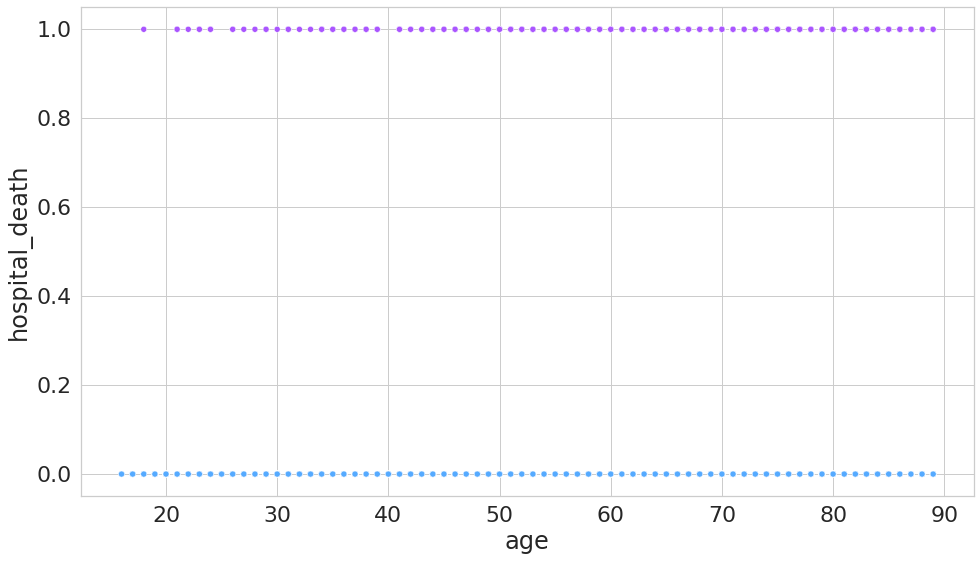

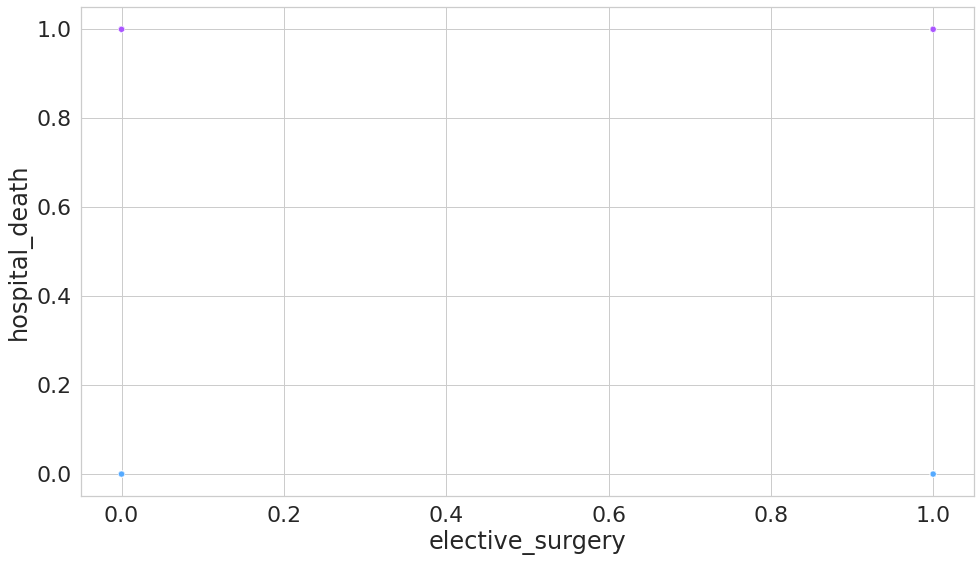

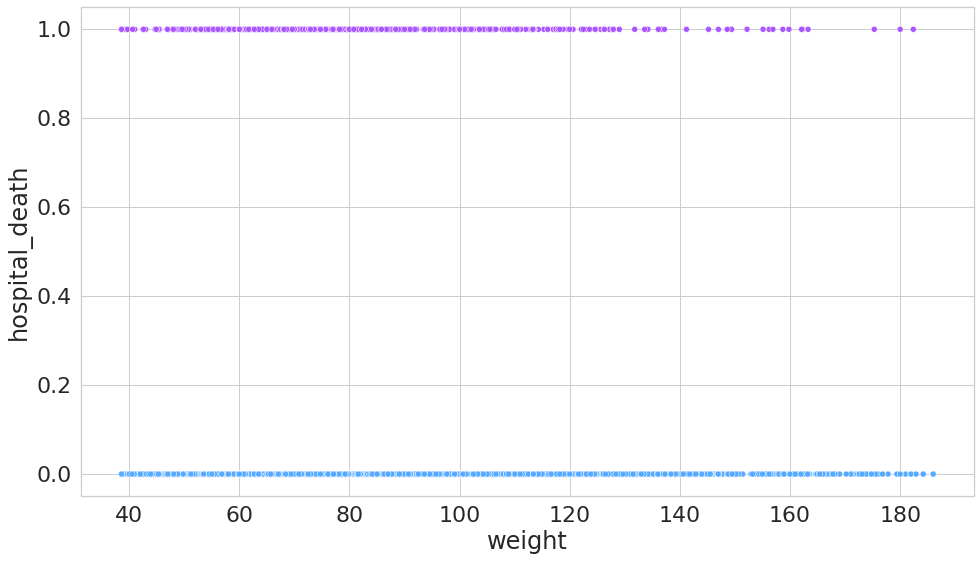

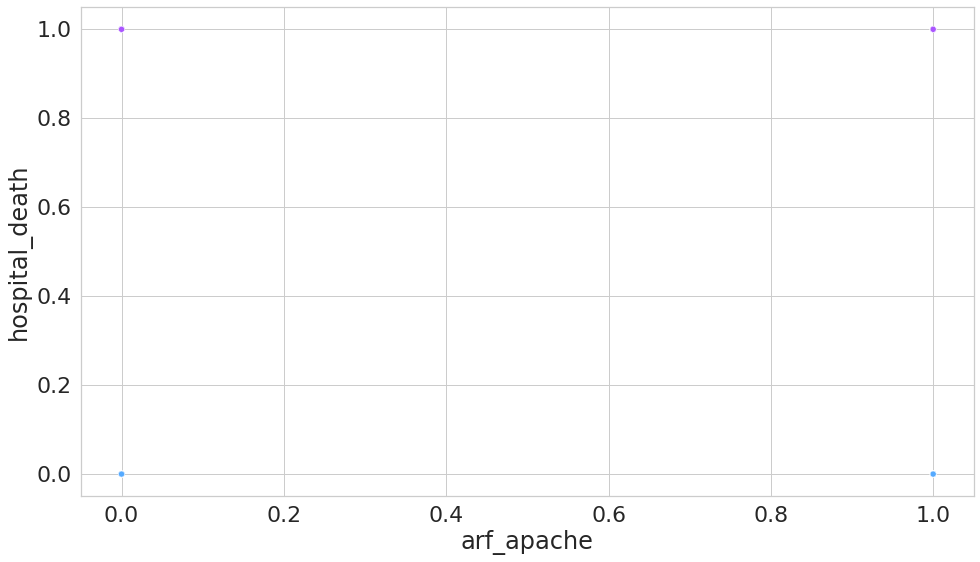

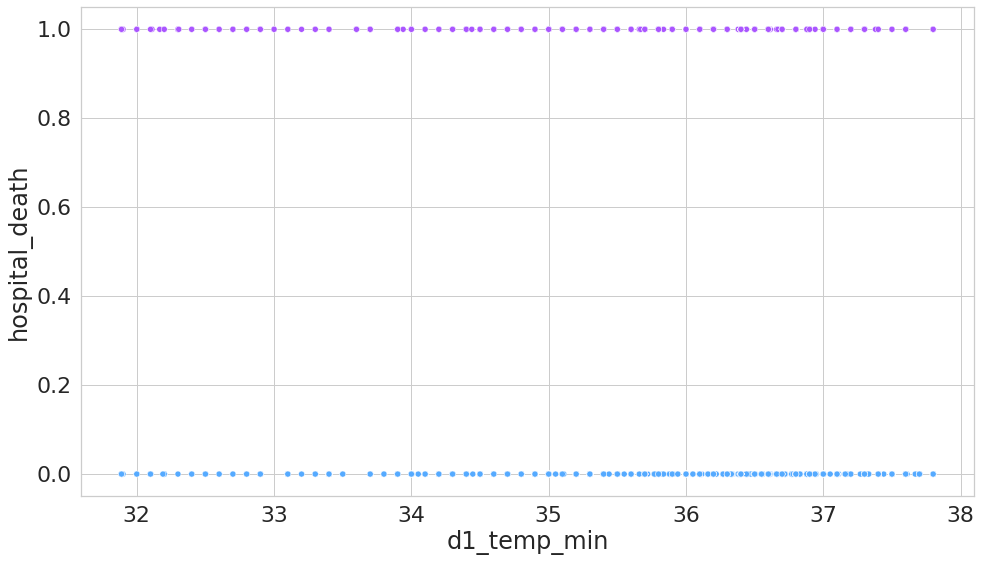

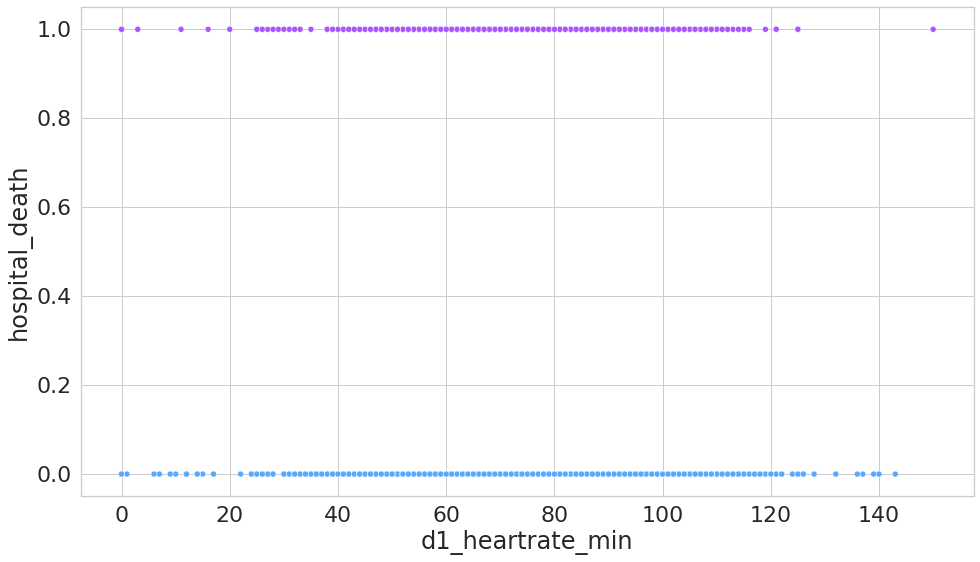

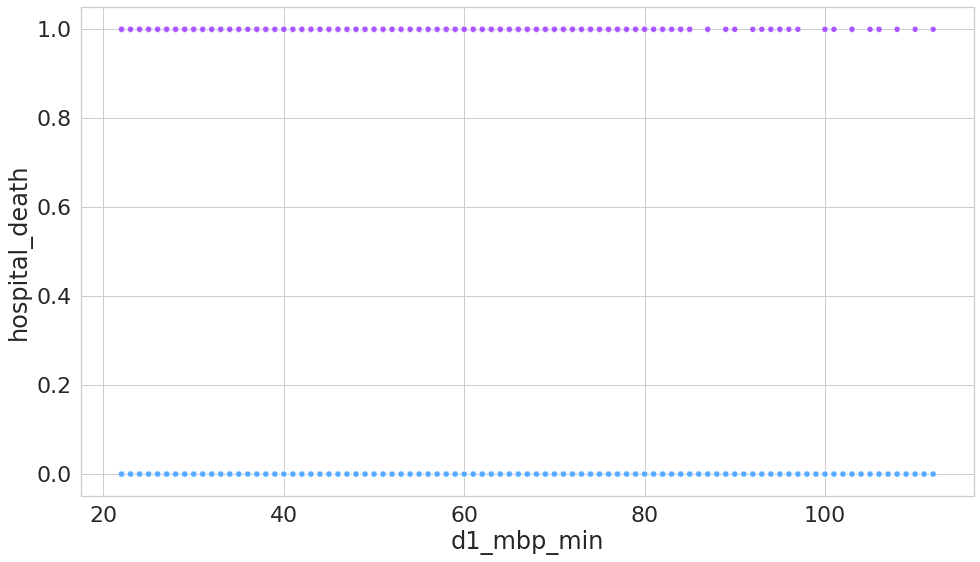

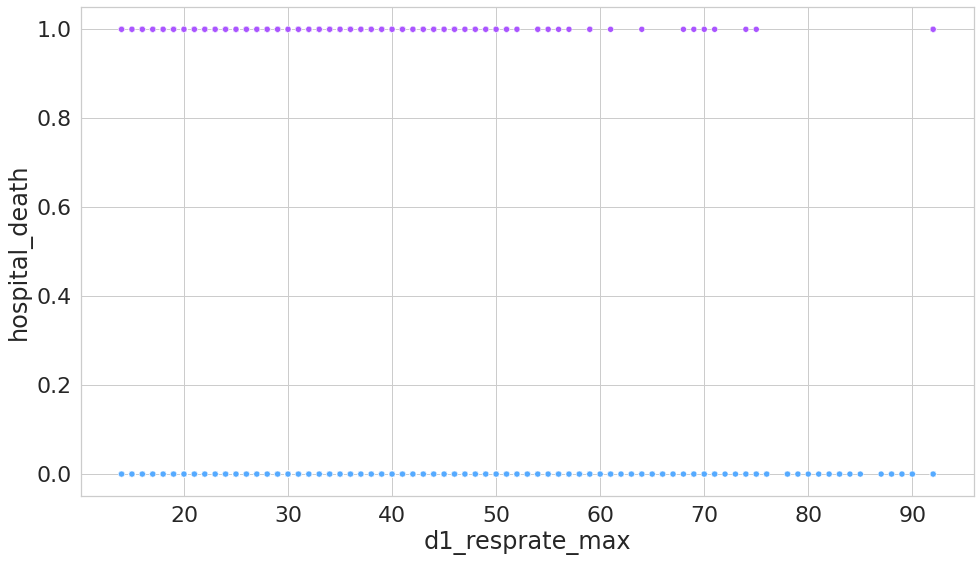

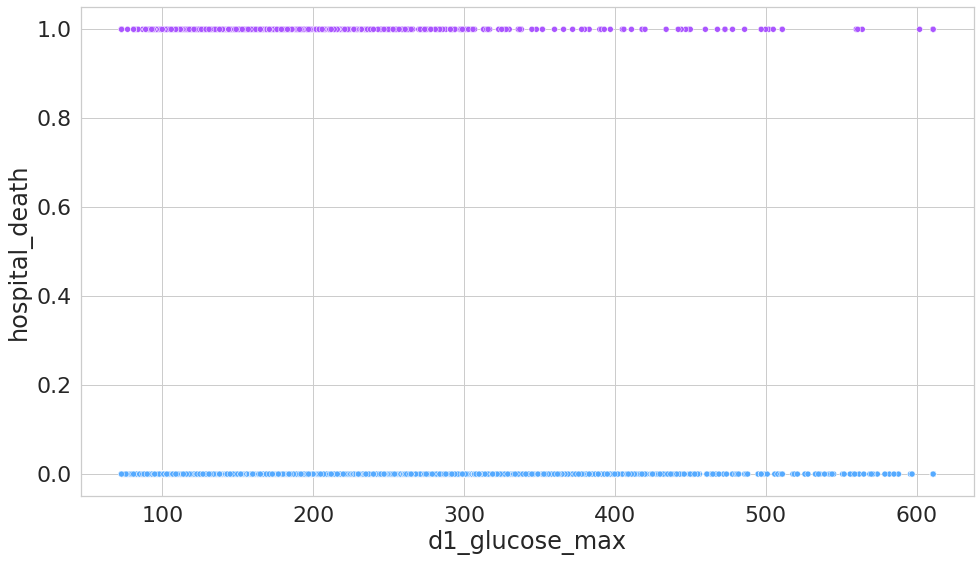

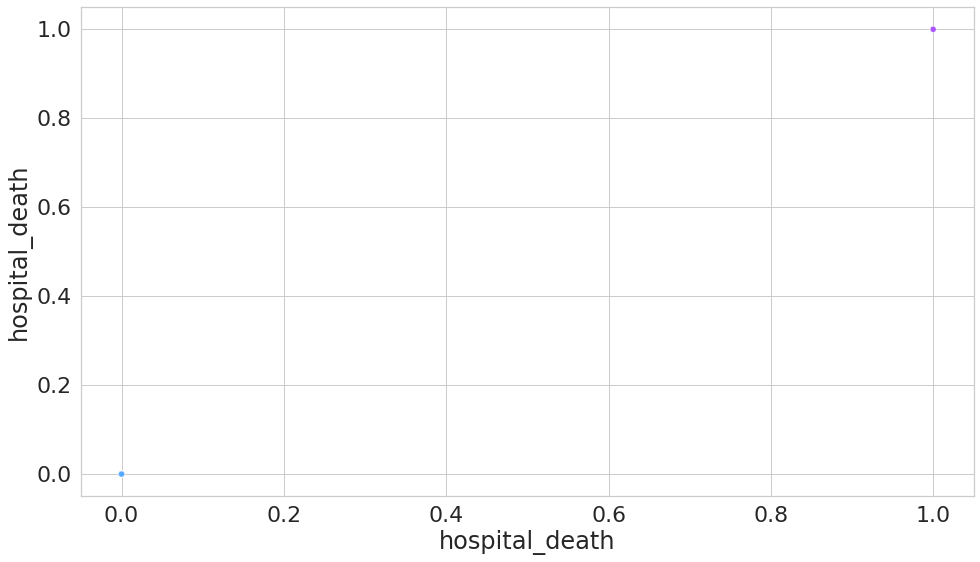

In [12]:
for feature in ICU.columns: 
  plt.figure(figsize=(16, 9)) 
  sns.scatterplot(data=sample_df, x=feature, y='hospital_death', hue='hospital_death', palette='cool', legend=False)

## Data Partition

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Column 0 to 9 in ICU dataframe are predictor variables
# Column 'hospital_death' in ICU dataframe is the target variable

X = ICU.iloc[:, np.r_[0:9]]
Y = ICU[['hospital_death']]

In [15]:
# Preview the predictor variables
X

,age,elective_surgery,weight,arf_apache,d1_temp_min,d1_heartrate_min,d1_mbp_min,d1_resprate_max,d1_glucose_max
0,68.0,0,73.9,0.0,37.2,72.0,46.0,34.0,168.0
1,77.0,0,70.2,0.0,35.1,72.0,38.0,32.0,145.0
3,81.0,1,61.7,0.0,34.8,92.0,84.0,23.0,185.0
5,67.0,0,100.0,0.0,36.6,83.0,80.0,32.0,156.0
6,59.0,0,156.6,0.0,35.0,70.0,97.0,38.0,197.0
...,...,...,...,...,...,...,...,...,...
91706,54.0,0,62.5,0.0,36.6,55.0,62.0,23.0,91.0
91708,75.0,0,72.9,0.0,36.6,70.0,48.0,27.0,400.0
91709,56.0,0,158.0,0.0,36.1,76.0,47.0,33.0,177.0
91710,48.0,0,78.9,0.0,35.8,79.0,57.0,34.0,538.0


In [16]:
# Preview the target variable
Y

,hospital_death
0,0
1,0
3,0
5,0
6,0
...,...
91706,0
91708,0
91709,0
91710,0


In [17]:
# Split the date to tarining (75%) and testing set (25%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=11)

In [18]:
# Size of predictors data for training
X_train.shape

(58212, 9)

In [19]:
# Size of predictors data for testing
X_test.shape

(19404, 9)

In [20]:
# Size of target data for training
y_train.shape

(58212, 1)

In [21]:
# Size of target data for testing
y_test.shape

(19404, 1)

## Modeling

1. KNN Modeling

In [22]:
# Import necessry packages for knn model and cross validation

from sklearn.neighbors import KNeighborsClassifier
# Define KNN model
knn = KNeighborsClassifier()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [23]:
# Use for loop to run multiple model in cross validation 
# Try diffrent k for KNN model
for k in range(1, 20, 2):
  kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator=knn, X=X, y=Y.values.ravel(), cv=kfold) 
  print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=87.13%; standard deviation=0.29%
k=3 ; mean accuracy=90.62%; standard deviation=0.24%
k=5 ; mean accuracy=91.43%; standard deviation=0.23%
k=7 ; mean accuracy=91.66%; standard deviation=0.23%
k=9 ; mean accuracy=91.74%; standard deviation=0.24%
k=11; mean accuracy=91.78%; standard deviation=0.25%
k=13; mean accuracy=91.81%; standard deviation=0.25%
k=15; mean accuracy=91.84%; standard deviation=0.24%
k=17; mean accuracy=91.84%; standard deviation=0.22%
k=19; mean accuracy=91.84%; standard deviation=0.23%


2. Neural Network Modeling

In [24]:
# Import necessry packages for neural network model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# Define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(9,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
# Complete the neural networks
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Fit the keras model on the dataset
model.fit(X_train, y_train, epochs=5, batch_size=64,validation_split=0.1)

Epoch 1/5
819/819 [==============================] - 3s 3ms/step - loss: 0.4579 - accuracy: 0.9078 - val_loss: 0.2803 - val_accuracy: 0.9160
Epoch 2/5
819/819 [==============================] - 2s 3ms/step - loss: 0.2684 - accuracy: 0.9173 - val_loss: 0.2695 - val_accuracy: 0.9162
Epoch 3/5
819/819 [==============================] - 2s 2ms/step - loss: 0.2603 - accuracy: 0.9178 - val_loss: 0.2586 - val_accuracy: 0.9167
Epoch 4/5
819/819 [==============================] - 2s 2ms/step - loss: 0.2548 - accuracy: 0.9182 - val_loss: 0.2535 - val_accuracy: 0.9176
Epoch 5/5
819/819 [==============================] - 2s 2ms/step - loss: 0.2510 - accuracy: 0.9187 - val_loss: 0.2497 - val_accuracy: 0.9177


In [28]:
# Obtain loss and accuracy for the neural network model

loss, accuracy = model.evaluate(X_test, y_test)

607/607 [==============================] - 1s 2ms/step - loss: 0.2473 - accuracy: 0.9201
